In [1]:
%matplotlib inline
import os
import torch
CUDA = torch.cuda.is_available()
if CUDA:
    DEVICE = torch.device('cuda:0')
print('torch:', torch.__version__, 'CUDA:', CUDA)
# training parameters
NUM_EPOCHS = 1000
SAMPLE_SIZE = 10
BATCH_SIZE = 100
LR = 1e-3
## Model Parameters
D = 2 # data point dimensions
HIDDEN_DIM = 200
PIXELS_DIM = 28*28
LATENTS_DIM = 10
REPARAMETERIZED = True
SAVE_VERSION = 'digit' 

torch: 1.3.0 CUDA: True


In [2]:
from torchvision import datasets, transforms
## data directory
DATA_DIR = '/home/hao/Research/sebm_data/'
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)
train_data = torch.utils.data.DataLoader(
                datasets.MNIST(DATA_DIR, train=True, download=True,
                               transform=transforms.ToTensor()),
                batch_size=BATCH_SIZE, shuffle=True) 

test_data = torch.utils.data.DataLoader(
                datasets.MNIST(DATA_DIR, train=False, download=True,
                               transform=transforms.ToTensor()),
                batch_size=BATCH_SIZE, shuffle=True) 

In [5]:
from sebm_mnist.modules.vae_ops import init_modules
modules, optimizer = init_modules(pixels_dim=PIXELS_DIM, 
                                 hidden_dim=HIDDEN_DIM, 
                                 latents_dim=LATENTS_DIM, 
                                 reparameterized=REPARAMETERIZED,
                                 CUDA=CUDA, 
                                 DEVICE=DEVICE, 
                                 LOAD_VERSION=None, 
                                 LR=LR)

In [17]:
# from quasi_conj.training_vae import train
# train(optimizer=optimizer,
#       modules=modules,
#       train_data=train_data,
#       num_epochs=NUM_EPOCHS,
#       sample_size=SAMPLE_SIZE,
#       batch_size=BATCH_SIZE,
#       CUDA=CUDA,
#       DEVICE=DEVICE, 
#       SAVE_VERSION=SAVE_VERSION)

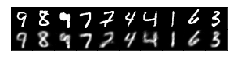

In [18]:
from quasi_conj.training_vae import sample_batch, visualize_reconstructions
# test_batch = sample_batch(test_data, data_ptr=3)
visualize_reconstructions(modules, test_batch, SAMPLE_SIZE, 10, 3, CUDA, DEVICE, save_name=SAVE_VERSION)

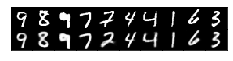

In [19]:
SAVE_VERSION = 'vae' 
modules, optimizer = init_modules(pixels_dim=PIXELS_DIM, 
                                 hidden_dim=HIDDEN_DIM, 
                                 latents_dim=LATENTS_DIM, 
                                 reparameterized=REPARAMETERIZED,
                                 CUDA=CUDA, 
                                 DEVICE=DEVICE, 
                                 LOAD_VERSION=SAVE_VERSION, 
                                 LR=LR)
visualize_reconstructions(modules, test_batch, SAMPLE_SIZE, 10, 3, CUDA, DEVICE, save_name=SAVE_VERSION)